# Trabajo Final 

_Fecha: 16 de mayo 2019_

Enviar un enlace a un repositorio de GitHub que contenga los trabajos realizados durante el semestre, la carpeta debe contener las siguientes entregas:

+ MNIST (digitos) con algoritmo deterministico
+ Tic-tac-toe
+ Sistema experto
+ Opcional (Artificial Life)
+ MNIST (digitos) machine learning - Kmeans
+ MNIST (digitos) deep learning, Tensorflow

# MNIST (dígitos) deep learning, Tensorflow

__Integrantes:__

+ Nombre: Maria Paula Vargas C.
+ Nombre: Samuel Stiven Abonia A.


Entrenar una red neuronal con el fin de detectar los dígitos de MNIST y comparar sus resultados contra el algoritmo determinístico y el modelo de machine learning kmeans.

Evaluar los resultados contra dos medidas de evaluación (accuracy y tiempo de entramiento). Se recomienda realizar el hold-out con un 80% para entrenamiento y un conjunto de testeo del 20%.


In [12]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Read data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
def inference(x):
    weight_init = tf.random_normal_initializer()
    bias_init = tf.constant_initializer(value=0)
    W = tf.get_variable("W", [784, 10], initializer=weight_init)
    b = tf.get_variable("b", [10], initializer=bias_init)
    output = tf.nn.softmax(tf.matmul(x, W) + b)
    return output

In [14]:
def loss(output, y):
    dot_product = y * tf.log(output)    
    xentropy = -tf.reduce_sum(dot_product, reduction_indices=1)
    loss = tf.reduce_mean(xentropy)
    return loss

In [15]:
def evaluate(output, y):
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

In [16]:
def training(cost, global_step):
    tf.summary.scalar("cost", cost)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)
    return train_op

In [17]:
# Parameters

learning_rate = 0.01
training_epochs = 300
batch_size = 100
display_step = 5

with tf.Graph().as_default():
    # mnist data image of shape 28*28=784
    x = tf.placeholder(tf.float32, [None, 784])    
    # 0-9 digits recognition => 10 classes
    y = tf.placeholder(tf.float32, [None, 10])    
    output = inference(x)    
    cost = loss(output, y) 
    
    global_step = tf.Variable(0, name='global_step', trainable=False)    
    train_op = training(cost, global_step)    
    eval_op = evaluate(output, y)
    
    summary_op = tf.summary.merge_all()    
    saver = tf.train.Saver()
    
    sess = tf.Session()    
    summary_writer = tf.summary.FileWriter("logistic_logs/", graph=sess.graph)
    
    init_op = tf.global_variables_initializer()    
    sess.run(init_op)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            mbatch_x, mbatch_y = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            feed_dict = {x : mbatch_x, y : mbatch_y}
            sess.run(train_op, feed_dict=feed_dict)
            # Compute average loss
            minibatch_cost = sess.run(cost, feed_dict=feed_dict)
            avg_cost += minibatch_cost/total_batch
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            val_feed_dict = {
                x : mnist.validation.images,
                y : mnist.validation.labels
            }
            accuracy = sess.run(eval_op, feed_dict=val_feed_dict)
            print ("Validation Error:", (1 - accuracy))
            summary_str = sess.run(summary_op, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, sess.run(global_step))
            
            saver.save(sess, "logistic_logs/model-checkpoint", global_step=global_step)
            
    print("Optimization Finished!")
    
    test_feed_dict = {
        x : mnist.test.images,
        y : mnist.test.labels
    }
    accuracy = sess.run(eval_op, feed_dict=test_feed_dict)
    print("Test Accuracy:", accuracy)

Validation Error: 0.7053999900817871
Validation Error: 0.31519997119903564
Validation Error: 0.232200026512146
Validation Error: 0.196399986743927
Validation Error: 0.17659997940063477
Validation Error: 0.1624000072479248
Validation Error: 0.1502000093460083
Validation Error: 0.14399999380111694
Validation Error: 0.13859999179840088
Validation Error: 0.1340000033378601
Validation Error: 0.1305999755859375
Validation Error: 0.1290000081062317
Validation Error: 0.12599998712539673
Validation Error: 0.12440001964569092
Validation Error: 0.12159997224807739
Validation Error: 0.11959999799728394
Validation Error: 0.9042000025510788
Validation Error: 0.9042000025510788
Validation Error: 0.9042000025510788
Validation Error: 0.9042000025510788
Validation Error: 0.9042000025510788
Validation Error: 0.9042000025510788
Validation Error: 0.9042000025510788
Validation Error: 0.9042000025510788
Validation Error: 0.9042000025510788
Validation Error: 0.9042000025510788
Validation Error: 0.904200002551

## Comparación contra el mejor modelo KMeans

## Aprendizaje Automatico

In [26]:
from sklearn.datasets import load_digits
import sklearn.metrics as metrics
import pylab as pl
import math
import sklearn
from sklearn.neighbors import KNeighborsClassifier

digits = load_digits()
percentFit = 0.8
numImagenes= len(digits.images)

timeKNN = 0.0

trainingLimit = math.floor(numImagenes*percentFit)+1
limit = math.ceil(numImagenes*percentFit)


targetTraining = digits.target[0:trainingLimit]
targeTest = digits.target[limit:]

imagesTraining = digits.images[0 : trainingLimit].reshape((len(targetTraining),-1))
imagesTest = digits.images[limit : ].reshape((len(targeTest),-1))


knn= KNeighborsClassifier()

initial_time = time()

fit = knn.fit(imagesTraining,targetTraining)

timeKNN = time()-initial_time


targetTest_estimado= fit.predict(imagesTest)
print("Reales   :", targeTest[0:25])
print("Estimados:", targetTest_estimado[0:25])


knn_accuracy = metrics.accuracy_score(targeTest, targetTest_estimado)
print("promedio KNN : ", knn_accuracy)
print("Tiempo Entrenamiento KNN: ", timeKNN)





Reales   : [3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1]
Estimados: [3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1]
promedio KNN :  0.9637883008356546


## Comparación contra el resultado del algoritmo deterministico

In [3]:
from sklearn.datasets import load_digits
import pylab as pl

from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
import pylab as plt

digits = load_digits()
numImagenes= len(digits.images)
pl.gray() # Queremos las imágenes en grises

y = digits.target
X = digits.images.reshape((numImagenes, -1))


gnb = GaussianNB()
fit = gnb.fit(X, y)

<Figure size 432x288 with 0 Axes>

51.12359550561798
Promedio algoritmo deterministico para el número 3 60.10928961748634
Promedio  algoritmo deterministico 0.07234279354479689


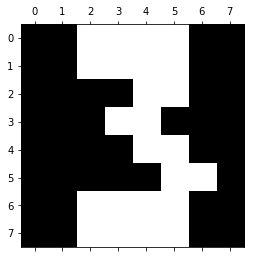

In [4]:
y=digits.target #aquí se obtienen las etiquetas de los dígitos
list = [] #lista donde van a almacenar las imagenes 
for i in range(0,len(y)):
    if(y[i] == 0):
        list.append(digits.images[i])
        



 #for p in list:
 #   pl.matshow(p)
    
    #En este metodo identificamos si en la parte superior de la matriz 
    #tiene la forma de un cero verificando que haya una linea continua de blancos
    
def identifyZeroTop (digitos):
    top=digitos[0:2]
    count=0
    errorCount=0
    
    for fila in range(0,len(top)): 
        for num in range(1,7) :
            if(top[0,num]==0.0):
                count+=1
            if(count==2):
                errorCount+=1
           
    if(errorCount>=2):
        return False
    else:
        return True
    #En este metodo identificamos si en la parte inferior de la matriz 
    #tiene la forma de un cero verificando que haya una linea continua de blancos
def identifyZeroBot (digitos):
    bottom=digitos[6:8]
    
    count=0
    errorCount=0
    
    for fila in range(0,len(bottom)): 
        for num in range(1,7) :
            if(bottom[0,num]==0.0):
                count+=1
            if(count==2):
                errorCount+=1
           
    if(errorCount>=2):
        return False
    else:
        return True
    #En este metodo identificamos si en la parte izquierda de la matriz 
    #tiene la forma de un cero verificando que haya una linea continua de blancos    

def identifyZeroLeft(digitos):
    left1=[row[1] for row in digitos]
    left2=[row[2] for row in digitos]
   
    errorCount=0
    count=0
    for num in range(1,8) :
        if(left1[num]==0.0):
            count+=1
        if(count==2):
            errorCount+=1
        else:
            count=0
    count=0
    for num in range(1,8) :
        if(left2[num]==0.0):
            count+=1
        if(count==2):
            errorCount+=1
        
            
    if(errorCount>=2):
        return False
    else:
        return True
   #En este metodo identificamos si en la parte derecha de la matriz 
    #tiene la forma de un cero verificando que haya una linea continua de blancos
    
def identifyZeroRight(digitos):
    right1=[row[5] for row in digitos]
    right2=[row[6] for row in digitos]
    
    errorCount=0
    count=0
    for num in range(1,8) :
        if(right1[num]==0.0):
            count+=1
        if(count==2):
            errorCount+=1
        
    count=0
    
    for num in range(1,8) :
        if(right1[num]==0.0):
            count+=1
        if(count==2):
            errorCount+=1
            
    if(errorCount>=2):
        return False
    else:
        return True
    
   #Este método una la verificación de los métodos que identifican por cuadrantes el cero

def identifyZero(digitos):
    isZero=identifyZeroTop(digitos)&identifyZeroBot(digitos)&identifyZeroLeft(digitos)&identifyZeroRight(digitos)
    return isZero


#Este metodo se encarga de sacar la probabilidad de coincidencia de las matrices

def probabilidad():
    count=0
    for zero in list:
        
        if(identifyZero(zero)):
            count+=1
    return (count/len(list))*100   

print(probabilidad())

y=digits.target #aquí se obtienen las etiquetas de los dígitos
list = [] #lista donde van a almacenar las imagenes 

#esta función agrega en una lista las matrices que representan al número 3
for i in range(0,len(y)):
    if(y[i] == 3):
        list.append(digits.images[i])
        

matrizPromedio= [[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]      
incidencia=27    
    
    #Este metodo genera una matriz promedio a partir de todas las matrices que representan los números tres
    #y retorna una matriz que se concidera un promedio de todas las matrices que hay.
def sacarMatrizPromedio():
    listMatriz=[[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]
    for k in list:
        listMatriz=k
        for i in range(8):
            for j in range(8):
                matrizPromedio[i][j]+= listMatriz[i][j]/len(list)
                
    for i in range(8):
        for j in range(8):
            if(matrizPromedio[i][j]<6):
                matrizPromedio[i][j]=0
            else:
                matrizPromedio[i][j]=16
    pl.matshow(matrizPromedio)

    
    # Este método permite comparar una matrizEntrante con la matriz promedio y comparando 55 espacios de cada matriz
def compararMatriz(matrizEntrante):
    for i in range(8):
        for j in range(8):
            if(matrizEntrante[i][j]<6):
                matrizEntrante[i][j]=0
                
            else:
                matrizEntrante[i][j]=16
    match=0
    for i in range(8):
        for j in range(8):
            if(matrizEntrante[i][j]==matrizPromedio[i][j]):
                   match=match+1
                
    if(match>55):        
        return True

    
    #Este metodo calcula la probabilidad dentro de la lista de matrices que solo representa al número tres
def probabilidad():
    count=0
    for tres in list:
        
        if(compararMatriz(tres)):
            count+=1
    return (count/len(list))*100

    #Este metodo calcula la probabilidad dentro de la lista que posee las matrices que representan a todos los numeros
def probabilidadTotal():
    count=0
    for tres in digits.images:
        
        if(compararMatriz(tres)):
            count+=1
    return (count/len(digits.images))

sacarMatrizPromedio()

print("Promedio algoritmo deterministico para el número 3: ",probabilidad())
print("Promedio  algoritmo deterministico: ", probabilidadTotal())

